In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.polynomial.polynomial import polyfit
import matplotlib.style as style
from IPython.display import Image
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
dff01 = pd.read_csv('http://cfile224.uf.daum.net/attach/992CFF3B5D5CC70C2C63F0')

In [ ]:
dff01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        5000 non-null   int64
 1   height     5000 non-null   int64
 2   weight     5000 non-null   int64
 3   amt_strbk  5000 non-null   int64
 4   amt_book   5000 non-null   int64
dtypes: int64(5)
memory usage: 195.4 KB


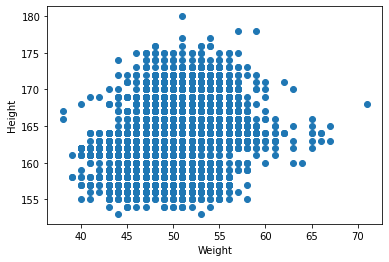

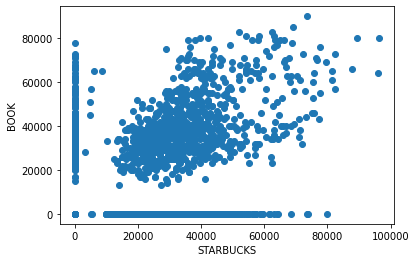

In [ ]:
# matplotlib sacatter 사용

plt.scatter(dff01.weight, dff01.height)
plt.xlabel('Weight')
plt.ylabel('Height')
plt.show()

plt.scatter(dff01.amt_strbk, dff01.amt_book)
plt.xlabel('STARBUCKS')
plt.ylabel('BOOK')
plt.show()

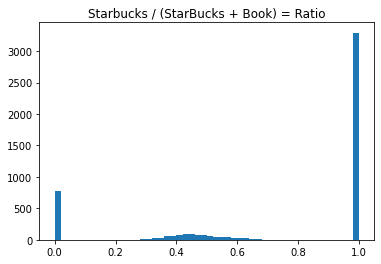

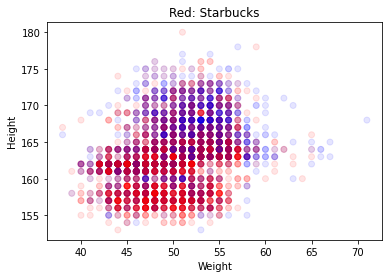

In [ ]:
dff01['rto_strbk'] = dff01.amt_strbk / (dff01.amt_strbk + dff01.amt_book + 0.001)
plt.hist(dff01.rto_strbk, bins=50)
plt.title('Starbucks / (StarBucks + Book) = Ratio')
plt.show()

# color 파랑 or 빨강 지정
colors1 = ['red' if x>=0.99 else 'blue' for x in dff01.rto_strbk]
# alpha = 투명도 지정
plt.scatter(dff01.weight, dff01.height, alpha=0.1, color=colors1)
plt.xlabel('Weight')
plt.ylabel('Height')
plt.title('Red: Starbucks')
plt.show()

   height  weight  rto_strbk  cnt_cust
0     153      44        1.0         1
1     153      53        0.0         1
2     154      43        1.0         1


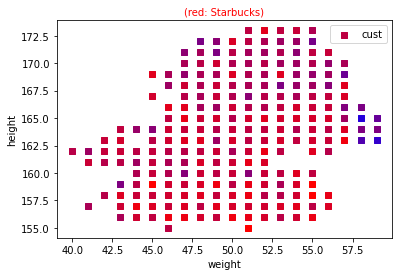

In [ ]:
dfc02z = dff01[['rto_strbk', 'height', 'weight']].groupby(['height', 'weight']).mean().reset_index()
dfc02z1 = dff01[['rto_strbk', 'height', 'weight']].groupby(['height', 'weight']).count().reset_index()
dfc02z1.columns = ['height', 'weight', 'cnt_cust']
dfc02z2 = dfc02z.merge(dfc02z1, how='left', on=['height', 'weight'])
print(dfc02z2.head(3))

dfc02z2 = dfc02z2[dfc02z2.cnt_cust>=5]
# color 지정 오류
colors1 = [(x, 0, 1-x) for x in dfc02z2.rto_strbk]

# ncust - mnmx_scl2(dfc02z2.cnt_cust)
# plt.hist(dfc02z3.cnt_cust, bins=50)
# plt.show()

# ncust = mnmx_scl2(dfc02z2.cnt_cust)
# plt.hist(dfc02z2.cnt_cust, bins=50)
# plt.show()

# plt.scatter(dfc02z2.weight, dfc02z2.height, color=colors1, marker='s')
plt.scatter(dfc02z2.weight, dfc02z2.height, color=colors1, marker='s')
plt.legend(['cust'])
plt.xlabel('weight')
plt.ylabel('height')
# plt.subtitle('Lady, Starbucks or Book?')
plt.title('(red: Starbucks)', size=10, color='r')
plt.show()

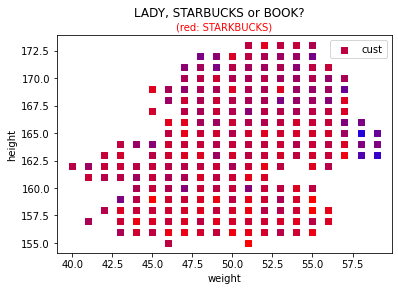

In [ ]:
plt.scatter(dfc02z2.weight, dfc02z2.height, color=colors1, marker='s')
plt.legend(['cust'])
plt.xlabel('weight')
plt.ylabel('height')
plt.suptitle('LADY, STARBUCKS or BOOK?')
plt.title('(red: STARKBUCKS)', size=10, color='r')
plt.show()

In [ ]:
dfc02z21 = dfc02z2
dfc02z21.drop(['cnt_cust'], axis=1)
dfc02z21.head()

,height,weight,rto_strbk,cnt_cust
16,155,46,0.742790,6
21,155,51,1.000000,6
30,156,43,0.666667,6
31,156,44,0.812500,16
32,156,45,0.750000,12


color1 반복문 오류
seaborn, heatmap 축 연습

In [ ]:
import seaborn as sns

In [ ]:
dfc02z21 = dfc02z21.pivot(index='height', columns='weight', values='rto_strbk')

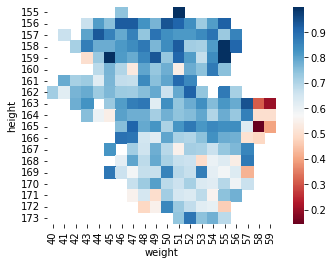

In [ ]:
sns.heatmap(dfc02z21, cmap='RdBu', square=True)
plt.show()

In [ ]:
dfc02z21[[45,46,47,48,49,50]].head()

weight,45,46,47,48,49,50
height,,,,,,
155,NaN,0.742790,NaN,NaN,NaN,NaN
156,0.750000,0.928571,0.926997,0.827061,0.769231,0.941176
157,0.860032,0.789474,0.861700,0.739236,0.887682,0.834955
158,0.782934,0.816333,0.840793,0.876252,0.767102,0.841637
159,1.000000,0.813832,0.787359,0.851208,0.937500,0.736842


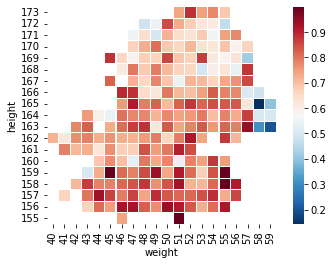

In [ ]:
dfc02z21 = dfc02z2.pivot(index='height', columns='weight', values='rto_strbk')
# Y축 값을 재정렬(큰 값에서 작은 값의 순서로)
dfc02z21 = dfc02z21.sort_values('height', ascending=False)
sns.heatmap(dfc02z21, cmap='RdBu_r', square=True, linewidth=0.1) # 컬러맵 색을 반대로

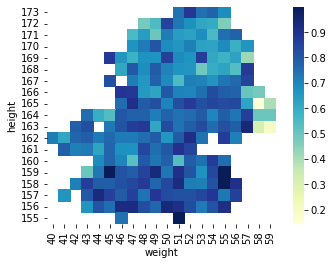

In [ ]:
# if you want to change the color pattern?
sns.heatmap(dfc02z21, cmap="YlGnBu", square=True)

### scatter plot에서 cell의 크기로 사람수를 표시해보면 ?

Text(0.5, 1.0, '(red: Starbucks)')

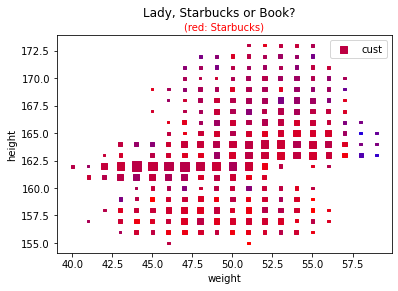

In [ ]:
plt.scatter(dfc02z2.weight, dfc02z2.height, s=dfc02z2.cnt_cust, color=colors1, marker='s')
plt.legend(['cust'])
plt.xlabel('weight')
plt.ylabel('height')
plt.suptitle('Lady, Starbucks or Book?')
plt.title('(red: Starbucks)', size=10, color='r')

## Summary

Heatmap은 EDA에서 매우 유용

생각보다는 heatmap 전용 기능 대신 scatter 
사용하는 장점이 많음

scatter : 마음대로 그리는 것이 가능 - Flexible

기본기능이므로 버전, 옵션 바뀌는 걱정이 없음
